# Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


# Data

In [10]:

df = pd.read_csv('Heart_Disease_Prediction.csv')

In [11]:
df.head()
df.rename(columns={'Heart Disease':'Disease'},inplace=True)


In [12]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [13]:

df.rename(columns={'Heart Disease':'Disease'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Disease                  270 non-null    object 
dtypes: float64(1), int64(12), 

In [14]:
df.shape

(270, 14)

In [15]:
# Checking for missing values.
df.isnull().values.any()

False

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Disease                  270 non-null    object 
dtypes: float64(1), int64(12), 

In [17]:
# Checking for imbalanced data based on sex.
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [18]:
# Checking for imbalanced data based on outcome.
df['Disease'].value_counts()

Absence     150
Presence    120
Name: Disease, dtype: int64

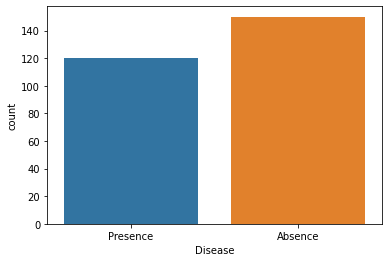

In [19]:
sns.countplot(x='Disease', data=df)

In [20]:
# Checking for any correlations.
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


# SVM

In [21]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [22]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [23]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

9.746794344808963

In [26]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf')
classifier.fit(x_train,y_train)


SVC()

In [27]:
y_pred = classifier.predict(x_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absen

In [28]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[44 11]
 [11 29]]


In [29]:
print(accuracy_score(y_test,y_pred))

0.7684210526315789


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Absence       0.80      0.80      0.80        55
    Presence       0.72      0.72      0.73        40

    accuracy                           0.77        95
   macro avg       0.76      0.76      0.76        95
weighted avg       0.77      0.77      0.77        95



### Method 1: Undersampling

In [31]:
# Class count
count_class_0, count_class_1 = df.Disease.value_counts()

#Divide by class
df_class_0 = df[df['Disease'] == 'Absence']
df_class_1 = df[df['Disease'] =='Presence']

In [32]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Disease.value_counts())

Random under-sampling:
Absence     120
Presence    120
Name: Disease, dtype: int64


In [33]:
X = df_test_under.drop('Disease',axis='columns')
y = df_test_under['Disease']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [34]:
# Number of classes in training Data
y_train1.value_counts()

Presence    96
Absence     96
Name: Disease, dtype: int64

In [37]:
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train1,y_train1)

SVC()

In [38]:
y_pred1 = classifier.predict(X_test1)

In [39]:
print(accuracy_score(y_test1,y_pred1))

0.7291666666666666


In [40]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

     Absence       0.68      0.88      0.76        24
    Presence       0.82      0.58      0.68        24

    accuracy                           0.73        48
   macro avg       0.75      0.73      0.72        48
weighted avg       0.75      0.73      0.72        48



### Method2: Oversampling

In [41]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Disease.value_counts())

Random over-sampling:
Absence     150
Presence    150
Name: Disease, dtype: int64


In [42]:
X = df_test_over.drop('Disease',axis='columns')
y = df_test_over['Disease']

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [43]:
# Number of classes in training Data
y_train2.value_counts()

Presence    120
Absence     120
Name: Disease, dtype: int64

In [46]:

classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train2,y_train2)

SVC()

In [47]:
y_pred2 = classifier.predict(X_test2)

In [48]:
print(accuracy_score(y_test2,y_pred2))

0.6833333333333333


In [49]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

     Absence       0.65      0.80      0.72        30
    Presence       0.74      0.57      0.64        30

    accuracy                           0.68        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.69      0.68      0.68        60



### Method3: SMOTE

In [50]:
X = df.drop('Disease',axis='columns')
y = df['Disease']

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Presence    150
Absence     150
Name: Disease, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train3.value_counts()

Presence    120
Absence     120
Name: Disease, dtype: int64

In [61]:

classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train3,y_train3)

SVC()

In [62]:
y_pred3 = classifier.predict(X_test3)

In [63]:
print(accuracy_score(y_test3,y_pred3))

0.65


In [64]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

     Absence       0.61      0.83      0.70        30
    Presence       0.74      0.47      0.57        30

    accuracy                           0.65        60
   macro avg       0.67      0.65      0.64        60
weighted avg       0.67      0.65      0.64        60



###Method 5 : Borderline SMOTE 1

In [65]:
X = df.drop('Disease',axis='columns')
y = df['Disease']

In [66]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-1')
X_bs, y_bs = bsmote.fit_resample(X, y)

y_bs.value_counts()

Presence    150
Absence     150
Name: Disease, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_bs, y_bs, test_size=0.2, random_state=15, stratify=y_bs)

In [68]:
# Number of classes in training Data
y_train5.value_counts()

Presence    120
Absence     120
Name: Disease, dtype: int64

In [69]:

classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train5,y_train5)

SVC()

In [70]:
y_pred5 = classifier.predict(X_test5)
print(accuracy_score(y_test5,y_pred5))


0.6333333333333333


In [71]:
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

     Absence       0.61      0.77      0.68        30
    Presence       0.68      0.50      0.58        30

    accuracy                           0.63        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.63      0.63        60



###Method 6: Borderline SMOTE 2

In [72]:
X = df.drop('Disease',axis='columns')
y = df['Disease']

In [73]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-2')
X_bsm, y_bsm = bsmote.fit_resample(X, y)

y_bsm.value_counts()

Presence    150
Absence     150
Name: Disease, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_bsm, y_bsm, test_size=0.2, random_state=15, stratify=y_bsm)

In [75]:
# Number of classes in training Data
y_train6.value_counts()

Presence    120
Absence     120
Name: Disease, dtype: int64

In [76]:

classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train6,y_train6)

SVC()

In [77]:
y_pred6 = classifier.predict(X_test6)
print(accuracy_score(y_test6,y_pred6))

0.6333333333333333


In [78]:
print(classification_report(y_test6, y_pred6))

              precision    recall  f1-score   support

     Absence       0.62      0.70      0.66        30
    Presence       0.65      0.57      0.61        30

    accuracy                           0.63        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.63      0.63        60



###Method 7 : SVMSmote

In [79]:
X = df.drop('Disease',axis='columns')
y = df['Disease']

In [80]:
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(sampling_strategy='minority',random_state = 42)
X_svm, y_svm = svmsmote.fit_resample(X, y)

y_svm.value_counts()

Presence    150
Absence     150
Name: Disease, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_svm, y_svm, test_size=0.2, random_state=15, stratify=y_svm)

In [82]:
y_train7.value_counts()

Presence    120
Absence     120
Name: Disease, dtype: int64

In [83]:

classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train7,y_train7)

SVC()

In [84]:
y_pred7 = classifier.predict(X_test7)
print(accuracy_score(y_test7,y_pred7))

0.6666666666666666


In [85]:
print(classification_report(y_test7, y_pred7))

              precision    recall  f1-score   support

     Absence       0.63      0.80      0.71        30
    Presence       0.73      0.53      0.62        30

    accuracy                           0.67        60
   macro avg       0.68      0.67      0.66        60
weighted avg       0.68      0.67      0.66        60



###Method 8 : ADASYN

In [86]:
X = df.drop('Disease',axis='columns')
y = df['Disease']

In [87]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority',random_state = 42)
X_ada, y_ada = ada.fit_resample(X, y)

y_ada.value_counts()

Absence     150
Presence    131
Name: Disease, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_ada, y_ada, test_size=0.2, random_state=15, stratify=y_ada)

In [89]:
y_train8.value_counts()

Absence     120
Presence    104
Name: Disease, dtype: int64

In [90]:

classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train8,y_train8)

SVC()

In [91]:
y_pred8 = classifier.predict(X_test8)
print(accuracy_score(y_test8,y_pred8))

0.631578947368421


In [92]:
print(classification_report(y_test8, y_pred8))

              precision    recall  f1-score   support

     Absence       0.60      0.87      0.71        30
    Presence       0.71      0.37      0.49        27

    accuracy                           0.63        57
   macro avg       0.66      0.62      0.60        57
weighted avg       0.66      0.63      0.61        57



###Method 9 : SMOTEENN

In [93]:
from imblearn.combine import SMOTEENN

In [94]:
X = df.drop('Disease',axis='columns')
y = df['Disease']

In [95]:

enn = SMOTEENN(sampling_strategy='minority',random_state = 42)
X_smt, y_smt = enn.fit_resample(X, y)

y_smt.value_counts()

Presence    47
Absence     42
Name: Disease, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X_smt, y_smt, test_size=0.2, random_state=15, stratify=y_smt)

In [97]:
y_train9.value_counts()

Presence    37
Absence     34
Name: Disease, dtype: int64

In [98]:

classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train9,y_train9)

SVC()

In [99]:
y_pred9 = classifier.predict(X_test9)
print(accuracy_score(y_test9,y_pred9))

0.7222222222222222


In [100]:
print(classification_report(y_test9, y_pred9))

              precision    recall  f1-score   support

     Absence       0.62      1.00      0.76         8
    Presence       1.00      0.50      0.67        10

    accuracy                           0.72        18
   macro avg       0.81      0.75      0.71        18
weighted avg       0.83      0.72      0.71        18



###Method 10 : SMOTETomek

In [101]:
X = df.drop('Disease',axis='columns')
y = df['Disease']

In [102]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(sampling_strategy='minority',random_state = 42)
X_smtt, y_smtt = smotetomek.fit_resample(X, y)

y_smtt.value_counts()

Presence    126
Absence     126
Name: Disease, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_smtt, y_smtt, test_size=0.2, random_state=15, stratify=y_smtt)

In [104]:
y_train10.value_counts()

Presence    101
Absence     100
Name: Disease, dtype: int64

In [105]:

classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train10,y_train10)

SVC()

In [106]:
y_pred10 = classifier.predict(X_test10)
print(accuracy_score(y_test10,y_pred10))

0.7058823529411765


In [107]:
print(classification_report(y_test10, y_pred10))

              precision    recall  f1-score   support

     Absence       0.69      0.77      0.73        26
    Presence       0.73      0.64      0.68        25

    accuracy                           0.71        51
   macro avg       0.71      0.70      0.70        51
weighted avg       0.71      0.71      0.70        51



###Confusion Matrix for all algorithms

In [108]:
import seaborn as sn 



In [109]:
print("SVM Algotithm")
print(classification_report(y_test, y_pred))


print("1 : Undersampling")
print(classification_report(y_test1, y_pred1))


print("2 : Oversampling")
print(classification_report(y_test2, y_pred2))


print("3 : SMOTE")
print(classification_report(y_test3, y_pred3))


# print("4 : Ensemble with Undersampling")
# print(classification_report(y_test4, y_pred_final))


print("5 : Borderline SMOTE 1")
print(classification_report(y_test5, y_pred5))



print("6 : Borderline SMOTE 2")
print(classification_report(y_test6, y_pred6))

print("7 : SVM SMOTE")
print(classification_report(y_test7, y_pred7))

print("8 : ADASYN ")
print(classification_report(y_test8, y_pred8))

print("9 : SMOTEENN ")
print(classification_report(y_test9, y_pred9))

print("10 : SMOTETOMEK ")
print(classification_report(y_test10, y_pred10))


SVM Algotithm
              precision    recall  f1-score   support

     Absence       0.80      0.80      0.80        55
    Presence       0.72      0.72      0.73        40

    accuracy                           0.77        95
   macro avg       0.76      0.76      0.76        95
weighted avg       0.77      0.77      0.77        95

1 : Undersampling
              precision    recall  f1-score   support

     Absence       0.68      0.88      0.76        24
    Presence       0.82      0.58      0.68        24

    accuracy                           0.73        48
   macro avg       0.75      0.73      0.72        48
weighted avg       0.75      0.73      0.72        48

2 : Oversampling
              precision    recall  f1-score   support

     Absence       0.65      0.80      0.72        30
    Presence       0.74      0.57      0.64        30

    accuracy                           0.68        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.69  